In [1]:
dirname = "./"

train_bad = "train_pdStack_index_b0_5.pkl.csv"
train_good = "train_pdStack_index_b4_5.pkl.csv"
test_good = "test_pdStack_index_b4_5.pkl.csv"

import pandas as pd

import os, io


In [2]:
df = pd.read_csv(os.path.join(dirname, train_good), index_col=0)
df

cif                 nodes_cansmi  \
0        hMOF-14385  ['[Zn][O]([Zn])([Zn])[Zn]']   
1         hMOF-9549  ['[Zn][O]([Zn])([Zn])[Zn]']   
2        hMOF-17956                 ['[Zn][Zn]']   
3      hMOF-5025143  ['[Zn][O]([Zn])([Zn])[Zn]']   
4      hMOF-5019274  ['[Zn][O]([Zn])([Zn])[Zn]']   
...             ...                          ...   
19267  hMOF-5074920                 ['[Cu][Cu]']   
19268    hMOF-30417                           []   
19269  hMOF-5056405                 ['[Zn][Zn]']   
19270  hMOF-1002427                      ['[V]']   
19271    hMOF-22992                 ['[Zn][Zn]']   

                                          linkers_cansmi rcsr  
0      ['N#Cc1c(C#CC(=O)[O-])c(C#N)c(c(c1C#N)C#CC(=O)...  pcu  
1      ['[O-]C(=O)c1ccc2c(c1)c(Cl)cc(c2Cl)C(=O)[O-]',...  pcu  
2      ['CCCc1c(C#CC(=O)[O-])cc(c(c1CCC)C#CC(=O)[O-])...  pcu  
3      ['[O-]C(=O)C#CC#CC(=O)[O-]', 'CCc1c(ccc(c1CC)C...  pcu  
4      ['ClC1C(Cl)C2(C#CC(=O)[O-])C(C(C1(C#CC(=O)[O-]...  pcu  
...                                                  ...  ...  
19267  ['NC1=C(C=Cc2cc(N)c(c(c2N)N)C(=O)[O-])C(=C(C(=...  pcu  
19268                                                 []  NaN  
19269  ['[O-]C(=O)c1cc(N)c(c(c1)N)N1C(=O)c2cc(N)c3c4c...  pcu  
19270  ['[O]', '[O-]C(=O)c1ccc2c(c1)ccc(c2)C(=O)[O-]'...  rna  
19271  ['[O-]C(=O)C1=C(O)c2c(C(=[C]1)O)c(O)c(cc2O)C(=...  pcu  

[19272 rows x 4 columns]

In [52]:
import ast, itertools
total_linkers = list(itertools.chain.from_iterable([ast.literal_eval(df["linkers_cansmi"].to_list()[x]) for x in df.index]))
total_linkers = [x for x in total_linkers if ("C" in x or "c" in x) and x != "N#N" and x != "[CH3]"]
unique_linkers = list(set(total_linkers))
total_nodes = list(itertools.chain.from_iterable([ast.literal_eval(df["nodes_cansmi"].to_list()[x]) for x in df.index]))
unique_nodes = list(set(total_nodes))

In [53]:
len(unique_linkers), len(unique_nodes)

(23010, 27)

In [54]:
len(total_nodes), len(total_linkers)

(18048, 51524)

['[Zn][O]([Zn])([Zn])[Zn]',
 '[Zn][Zn]',
 '[Cu][Cu]',
 '[V]',
 '[O]12[Zr]34[O]5[Zr]62[O]2[Zr]71[O]4[Zr]14[O]3[Zr]35[O]6[Zr]2([O]71)[O]43']

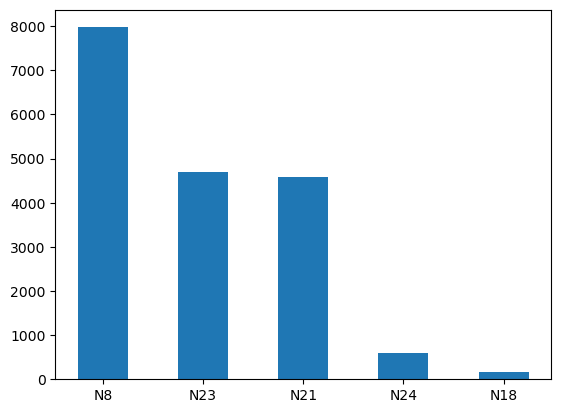

In [55]:
import matplotlib.pyplot as plt
index_map = dict(zip(list(set(total_nodes)), ["N"+str(x) for x in range(len(list(set(total_nodes))))]))
total_nodes_idx = pd.Series(total_nodes).map(index_map).to_list()
import collections
histog = collections.Counter(total_nodes_idx)
node_df = pd.DataFrame([histog.keys(), histog.values()]).T
node_df.columns = ["node_id", "freq"]
node_df["smi"] = node_df["node_id"].map({v: k for k, v in index_map.items()})
fig, ax = plt.subplots()
ax.bar(node_df[node_df["freq"]>10]["node_id"], node_df[node_df["freq"]>10]["freq"], width=0.5)
#ax.set_yscale("log")
#node_df[node_df[]]
node_df[node_df["freq"]>10]["smi"].to_list()

['[O-]C(=O)C#CC#CC(=O)[O-]',
 '[O-]C(=O)C#CC(=O)[O-]',
 'N#CC#N',
 '[O-]C(=O)C#CC#CC#CC(=O)[O-]',
 '[CH2]CC',
 '[O-]C(=O)c1ccc(cc1)c1ccc(cc1)c1ccc(cc1)C(=O)[O-]',
 '[O-]C(=O)c1ccc(cc1)C(=O)[O-]',
 '[O-]C(=O)C=CC(=O)[O-]',
 '[O-]C(=O)C(=O)[O-]',
 '[O-]C(=O)C#Cc1ccc(c(c1)F)C#CC(=O)[O-]',
 '[O-]C(=O)c1cc2ccc3c4c2c(c1)ccc4cc(c3)C(=O)[O-]',
 '[O-]C(=O)C#Cc1ccc(cc1)C#CC(=O)[O-]',
 'N#CC#CC#N',
 'CC(=CC#CC(=O)[O-])C#CC(=O)[O-]',
 '[O-]C(=O)c1ccc(cc1)C=Cc1ccc(cc1)C(=O)[O-]',
 '[O-]C(=O)C=CC=CC(=O)[O-]',
 '[O-]C(=O)C#CC=CC#CC(=O)[O-]',
 '[O-]C(=O)c1ccc2c(c1)ccc(c2)C(=O)[O-]',
 '[O-]C(=O)c1ccc(cc1)N=Nc1ccc(cc1)C(=O)[O-]',
 '[O-]C(=O)c1ccc(cc1)N1C(=O)c2ccc3c4c2c(C1=O)ccc4C(=O)N(C3=O)c1ccc(cc1)C(=O)[O-]',
 '[O-]C(=O)c1ccc(cc1)N1C(=O)c2ccc3c4c2c(C1=O)ccc4c1c2c3ccc3c2c(cc1)C(=O)N(C3=O)c1ccc(cc1)C(=O)[O-]',
 'FC(=CC#CC(=O)[O-])C#CC(=O)[O-]']

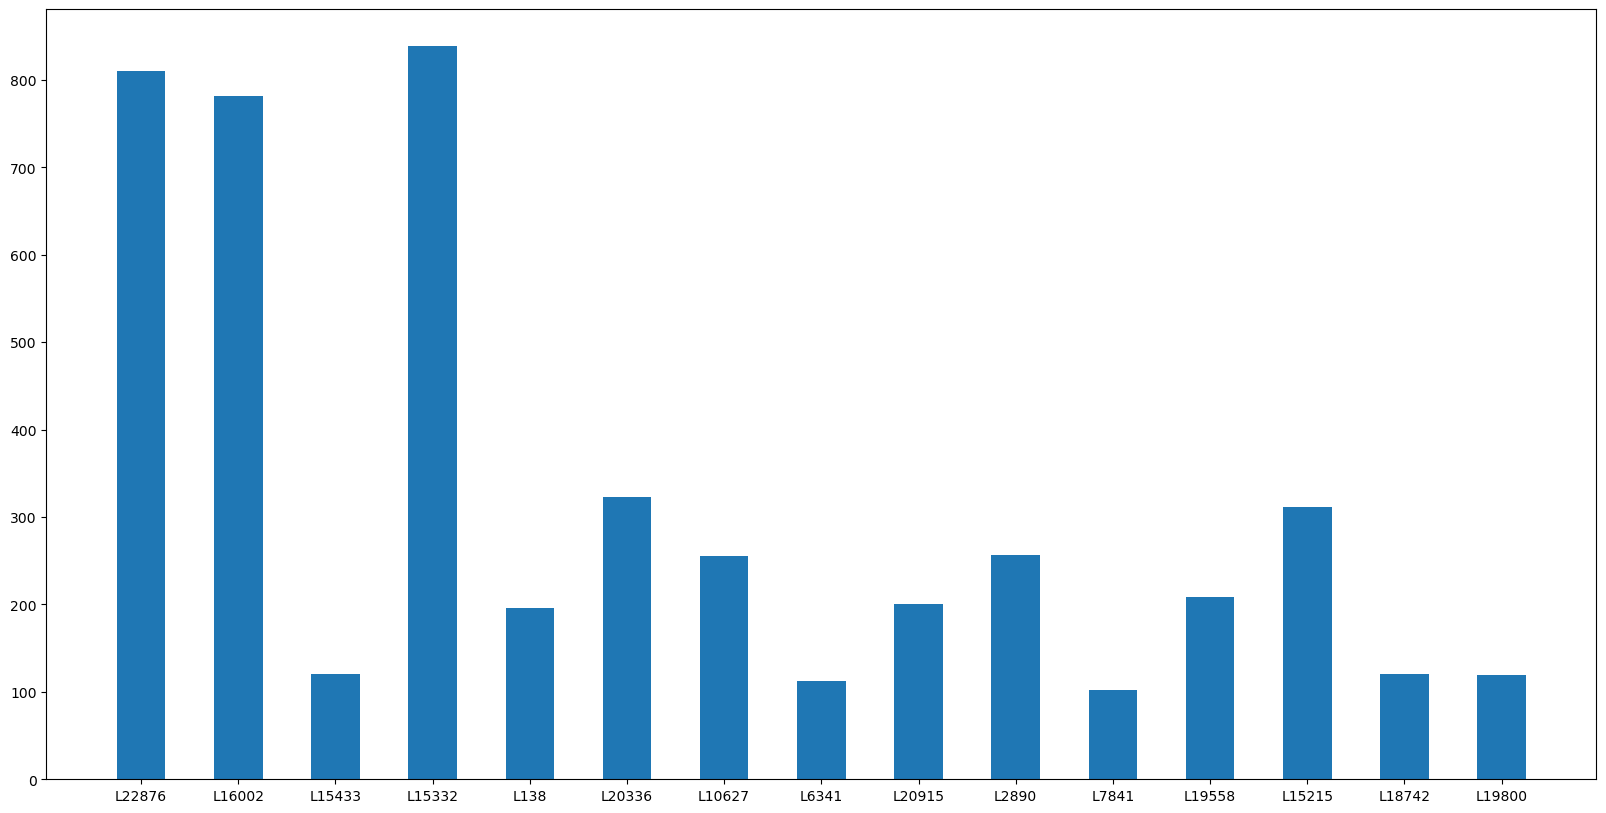

In [56]:
import matplotlib.pyplot as plt
index_map = dict(zip(list(set(total_linkers)), ["L"+str(x) for x in range(len(list(set(total_linkers))))]))
total_linkers_idx = pd.Series(total_linkers).map(index_map).to_list()
import collections
histog = collections.Counter(total_linkers_idx)
linker_df = pd.DataFrame([histog.keys(), histog.values()]).T
linker_df.columns = ["linker_id", "freq"]
linker_df["smi"] = linker_df["linker_id"].map({v: k for k, v in index_map.items()})
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(linker_df[linker_df["freq"]>100]["linker_id"], linker_df[linker_df["freq"]>100]["freq"], width=0.5)
#ax.set_yscale("log")
#linker_df[linker_df[]]
linker_df[linker_df["freq"]>80]["smi"].to_list()

[O-]C(=O)C#CC#CC(=O)[O-]


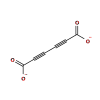

[O-]C(=O)C#CC(=O)[O-]


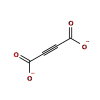

N#CC#N


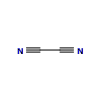

[O-]C(=O)C#CC#CC#CC(=O)[O-]


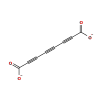

[O-]C(=O)c1ccc(cc1)C(=O)[O-]


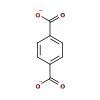

[O-]C(=O)C=CC(=O)[O-]


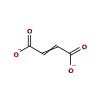

[O-]C(=O)C(=O)[O-]


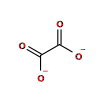

[O-]C(=O)C#Cc1ccc(c(c1)F)C#CC(=O)[O-]


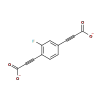

[O-]C(=O)C#Cc1ccc(cc1)C#CC(=O)[O-]


N#CC#CC#N


[O-]C(=O)c1ccc(cc1)C=Cc1ccc(cc1)C(=O)[O-]


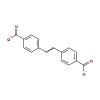

[O-]C(=O)C=CC=CC(=O)[O-]


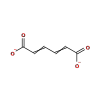

[O-]C(=O)C#CC=CC#CC(=O)[O-]


[O-]C(=O)c1ccc(cc1)N1C(=O)c2ccc3c4c2c(C1=O)ccc4C(=O)N(C3=O)c1ccc(cc1)C(=O)[O-]


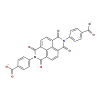

[O-]C(=O)c1ccc(cc1)N1C(=O)c2ccc3c4c2c(C1=O)ccc4c1c2c3ccc3c2c(cc1)C(=O)N(C3=O)c1ccc(cc1)C(=O)[O-]


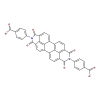

In [57]:
from openbabel import pybel
top_linkers = linker_df[linker_df["freq"]>100]["smi"].to_list()
xyzstrs = [pybel.readstring("smi", x.split()[0].strip()).write("xyz") for x in top_linkers]
for x in top_linkers:
    print(x)
    display(pybel.readstring("smi", x.split()[0].strip()))

[Zn][O]([Zn])([Zn])[Zn]


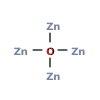

[Zn][Zn]


[Cu][Cu]


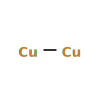

[V]


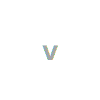

[O]12[Zr]34[O]5[Zr]62[O]2[Zr]71[O]4[Zr]14[O]3[Zr]35[O]6[Zr]2([O]71)[O]43


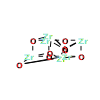

In [58]:
top_nodes = node_df[node_df["freq"]>10]["smi"].to_list()
xyzstrs = [pybel.readstring("smi", x.split()[0].strip()).write("xyz") for x in top_nodes]
for x in top_nodes:
    print(x)
    display(pybel.readstring("smi", x.split()[0].strip()))